In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from plotly import express as px
from plotly import graph_objects as go

from tensorflow.keras.regularizers import L2
from numpy import pi
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]


In [ ]:
data = make_circles(n_samples=1000,noise=0.1,factor=0.5)

In [ ]:
x = data[0]
y = data[1]

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          x = x[:,0],
                          y = x[:,1],
                          mode = "markers",
                          marker = dict(
                              color=y,
                              colorscale=color_chart[0:2]
                          ),
                      )
])

fig.show()

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val = tf.data.Dataset.from_tensor_slices((x_val,y_val))

train_batch = train.shuffle(len(train)).batch(8)
val_batch = val.shuffle(len(val)).batch(8)

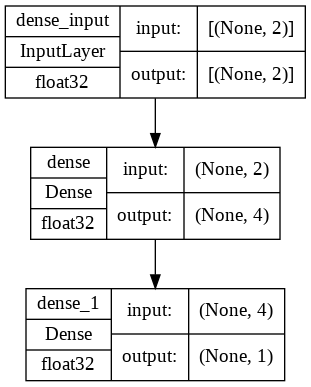

In [ ]:
model = Sequential([
                    Dense(4,"relu", input_shape=[2]),
                    Dense(1,"sigmoid")                                    
])
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

In [ ]:
model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

In [ ]:
history = model.fit(train_batch, epochs=100, validation_data=val_batch)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6771 - binary_accuracy: 0.5160 - val_loss: 0.6319 - val_binary_accuracy: 0.8200
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5975 - binary_accuracy: 0.7693 - val_loss: 0.5429 - val_binary_accuracy: 0.7800
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5119 - binary_accuracy: 0.8467 - val_loss: 0.4461 - val_binary_accuracy: 0.9200
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4248 - binary_accuracy: 0.9173 - val_loss: 0.3606 - val_binary_accuracy: 0.9400
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3556 - binary_accuracy: 0.9427 - val_loss: 0.3021 - val_binary_accuracy: 0.9400
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3024 - binary_accuracy: 0.9613 - val_loss: 0.2529 - val_binary_accuracy: 0.9520
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - los

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["binary_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[4]
                          )),
                      go.Scatter(
                          y=history.history["val_binary_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[5]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'    
)
fig.show()

In [ ]:
x1_example = np.linspace(-2,2,100)
x2_example = np.linspace(-2,2,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
    )
])
fig.add_trace(go.Scatter(x = x[:,0],
                         y = x[:,1],
                         mode = "markers",
                         marker = dict(
                             color=y,
                             colorscale=color_chart[0:2])
                         )
)
fig.show()

In [ ]:
N = 1000
theta = np.sqrt(np.random.rand(N))*4*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)
x_a = x_a/np.abs(x_a).max()

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)
x_b = x_b/np.abs(x_b).max()

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

fig = go.Figure(data=[
                      go.Scatter(x=res[:,0],
                                 y=res[:,1],
                                 mode="markers",
                                 marker=dict(
                                     color=res[:,2],
                                     colorscale=color_chart[0:2]
                                     )
                                 )
                      ]
                )
fig.show()

data = res[:,0:2]
target = res[:,-1]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, target)

In [ ]:
train_batch = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(len(X_train)).batch(8)
val_batch = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(len(X_val)).batch(8)

In [ ]:
next(iter(train_batch))

(<tf.Tensor: shape=(8, 2), dtype=float64, numpy=
 array([[ 0.24593075,  0.52709573],
        [ 0.16763663,  0.82858195],
        [-0.71090523, -0.26445651],
        [ 0.09779891,  0.41564202],
        [-0.13791161, -0.71910749],
        [ 0.63676843, -0.19217629],
        [ 0.37118   , -0.2932476 ],
        [-0.35412935,  0.52454405]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([0., 1., 0., 1., 0., 1., 0., 0.])>)

In [ ]:
model = Sequential([
                    Dense(64,"relu",input_shape=[2]),
                    Dense(32,"relu"),
                    Dense(1,"sigmoid")
])

In [ ]:
model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])

In [ ]:
history = model.fit(train_batch,epochs=100,validation_data=val_batch)

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 0.6521 - binary_accuracy: 0.6133 - val_loss: 0.6194 - val_binary_accuracy: 0.6020
Epoch 2/100
188/188 [==============================] - 0s 3ms/step - loss: 0.5821 - binary_accuracy: 0.6280 - val_loss: 0.5446 - val_binary_accuracy: 0.7200
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4746 - binary_accuracy: 0.7567 - val_loss: 0.4060 - val_binary_accuracy: 0.8100
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.3728 - binary_accuracy: 0.8020 - val_loss: 0.3366 - val_binary_accuracy: 0.8060
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.2781 - binary_accuracy: 0.8493 - val_loss: 0.2856 - val_binary_accuracy: 0.8200
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 0.2486 - binary_accuracy: 0.8800 - val_loss: 0.2602 - val_binary_accuracy: 0.8560
Epoch 7/100
188/188 [==============================] - 0s 

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

In [ ]:
x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
    )
])
fig.add_trace(go.Scatter(x = data[:,0],
                         y = data[:,1],
                         mode = "markers",
                         marker = dict(
                             color=target,
                             colorscale=color_chart[0:2])
                         )
)
fig.show()

In [ ]:
l2 = L2(0.0001)

model = Sequential([
                    Dense(64,"relu",input_shape=[2], kernel_regularizer=l2),
                    Dense(32,"relu", kernel_regularizer=l2),
                    Dense(1,"sigmoid", kernel_regularizer=l2)
])

model.compile(optimizer=Adam(0.01),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy()])


In [ ]:
history = model.fit(train_batch,epochs=500,validation_data=val_batch)

Epoch 1/500
188/188 [==============================] - 2s 3ms/step - loss: 0.6577 - binary_accuracy: 0.6060 - val_loss: 0.6384 - val_binary_accuracy: 0.6340
Epoch 2/500
188/188 [==============================] - 1s 3ms/step - loss: 0.6087 - binary_accuracy: 0.6020 - val_loss: 0.5414 - val_binary_accuracy: 0.6540
Epoch 3/500
188/188 [==============================] - 0s 3ms/step - loss: 0.5072 - binary_accuracy: 0.6480 - val_loss: 0.4843 - val_binary_accuracy: 0.6860
Epoch 4/500
188/188 [==============================] - 1s 3ms/step - loss: 0.4675 - binary_accuracy: 0.6867 - val_loss: 0.4611 - val_binary_accuracy: 0.7000
Epoch 5/500
188/188 [==============================] - 1s 3ms/step - loss: 0.4495 - binary_accuracy: 0.7073 - val_loss: 0.4272 - val_binary_accuracy: 0.7780
Epoch 6/500
188/188 [==============================] - 1s 3ms/step - loss: 0.4252 - binary_accuracy: 0.7447 - val_loss: 0.3873 - val_binary_accuracy: 0.7940
Epoch 7/500
188/188 [==============================] - 0s 

In [ ]:
x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example,x2_example)

example = np.array([[xx1,xx2] for xx1,xx2 in zip(x1.reshape(-1),x2.reshape(-1))])

pred_example = model(example).numpy().reshape([100,100])

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example,
        colorscale=[color_chart[-2],color_chart[-1]]
    )
])
fig.add_trace(go.Scatter(x = data[:,0],
                         y = data[:,1],
                         mode = "markers",
                         marker = dict(
                             color=target,
                             colorscale=color_chart[0:2])
                         )
)
fig.show()